# **Progetto 6: I mammiferi depongono uova?**

I dataset Zoo fornisce una serie di dati relativi a diverse specie animali al fine di classificarle in 7 diverse
classi, ovvero mammiferi, uccelli, rettili, pesci, anfibi, insetti e invertebrati.
Seguendo un approccio non supervisionato, ovvero senza osservare la classe di ogni specie animale, il
progetto mira a confrontare le diverse specie e raggruparle utilizzando diversi algoritmi di clustering.
Confrontando poi il risultato di ogni algoritmo, si intende mostrare quale algoritmo di clustering approssimi
meglio le classi fornite dal dataset.
Si richiede pertanto non solo di definire una metodologia per confrontare i risulati del clustering con la
classificazione attesa, ma anche di descrivere in modo sintetico le caratteristiche distintive di ciascun cluster
di specie prodotto dall'algoritmo oggetto della valutazione.

# **Esplorazione del dataset**

In the "Dataset" there are:
- "zoo.name": il file contenente la descrizione dei 18 attributi espressi sotto forma di colonne nel files "zoo.data"
        1. animal name:      Unique for each instance
        2. hair		Boolean
        3. feathers		Boolean
        4. eggs		Boolean
        5. milk		Boolean
        6. airborne		Boolean
        7. aquatic		Boolean
        8. predator		Boolean
        9. toothed		Boolean
        10. backbone		Boolean
        11. breathes		Boolean
        12. venomous		Boolean
        13. fins		Boolean
        14. legs		Numeric (set of values: {0,2,4,5,6,8})
        15. tail		Boolean
        16. domestic		Boolean
        17. catsize		Boolean
        18. type		Numeric (integer values in range [1,7])
- "zoo.data": dataset contenente in ogni riga la descrizione di ogni animale come 18 attributi espressi sotto forma di colonne
- "class.csv": il sataset delle classi o file dei risultati, contiene al suo interno la suddivisione nelle 7 diverse classi dei vari elementi del dataset "zoo.data". Di ogni classe espressa sotto forma di riga sono riportate le seguenti informazioni:
 Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names

In [1]:
import pandas as pd
import os
colnames = ['animal name', 'hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type']
zoo_data = pd.read_csv(os.getcwd()+'/Dataset/zoo.data', delimiter=',', names=colnames, header=None)
print(zoo_data)

    animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1 

In [2]:
# Costruiamo il sotto-dataset per la classificazione, senza la colonna 'type'
zoo_data_clustering=zoo_data[['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize']]
print(zoo_data_clustering)

     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0       1         0     0     1         0        0         1        1   
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
..    ...       ...   ...   ...       ...      ...       ...      ...   
96      1         0     0     1         0        0         0        1   
97      1         0     1     0         1        0         0        0   
98      1         0     0     1         0        0         1        1   
99      0         0     1     0         0        0         0        0   
100     0         1     1     0         1        0         0        0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
0           1         1         0     0     4     

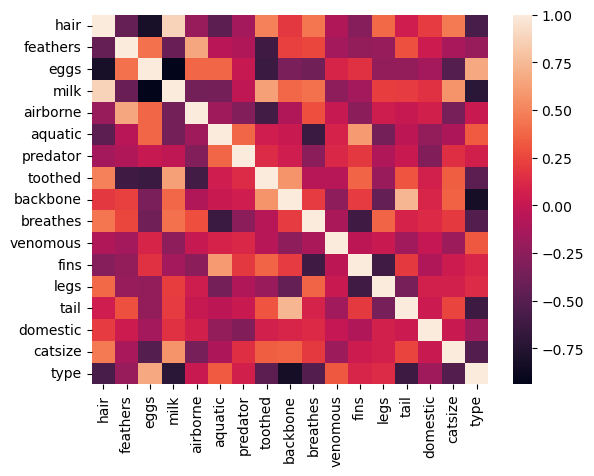

In [3]:
import seaborn as sns
#plotting the heatmap for correlation
plot_heatmap = sns.heatmap(zoo_data.corr())

# Algoritmi di Clustering

# K-means 

Tale algoritmo richiede di conoscere a priori del numero di cluster totali.

classifica i punti dell’input nei vari cluster;
aggiusta iterativamente la dimensione dei cluster, spostando i punti nei cluster più vicini a loro;
ad ogni iterazione, aggiorna i centroidi dei cluster finché non si raggiunge un criterio di ottimalità.

In [4]:
# Definiamo il numero K di cluster presenti nei dati:
from sklearn.cluster import KMeans
# Crea un'istanza di KMeans con 7 cluster
kmeans = KMeans(n_clusters=7)
# Addestra il modello di K-means sul dataset
kmeans.fit(zoo_data[['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize']])

KMeans(n_clusters=7)

In [9]:
# Assegno una classe ad ogni esempio del dataset
y = kmeans.predict(zoo_data[['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize']])

# Assegna le etichette dei cluster a ogni oggetto del dataset
zoo_data['Cluster'] = kmeans.predict(zoo_data[['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize']])

# Mostra le prime 5 righe del dataframe con la colonna Cluster aggiunta
zoo_data.head(20)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,Cluster
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,2
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,2
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,1
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,2
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,2
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,2
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1,2
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4,1
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,1
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1,2


In [10]:
# Valutazione cluster
for result_cluster in (zoo_data['Cluster'].unique()):
    sub_df=zoo_data[zoo_data["Cluster"]==result_cluster]
    sub_df_frequency = sub_df['type'].value_counts()
    print(sub_df_frequency)
    


1    31
Name: type, dtype: int64
4    13
1     3
3     3
Name: type, dtype: int64
2    20
Name: type, dtype: int64
7    4
Name: type, dtype: int64
5    4
3    2
7    1
Name: type, dtype: int64
6    8
7    5
Name: type, dtype: int64
1    7
Name: type, dtype: int64
